<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos.
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [1]:
# Utilice este espacio para escribir el código.
# Cargamos las librerías a utilizar
import pandas as pd
import numpy as np

pd.read_csv('data/artists.dat', nrows=3 )

,id\tname\turl\tpictureURL
0,1\tMALICE MIZER\thttp://www.last.fm/music/MALI...
1,2\tDiary of Dreams\thttp://www.last.fm/music/D...
2,3\tCarpathian Forest\thttp://www.last.fm/music...


In [2]:
# Cargamos los datos de los artistas
a_cols = ['artistID', 'artistNAME']

artists = pd.read_csv('data/artists.dat', sep='\t', usecols=[0, 1], header=0, names=a_cols)


#urlartists="https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Semana%205/Taller/data/artists.dat"
#artists = pd.read_csv(urlartists, sep='\t', usecols=[0, 1], header=0, names=a_cols)


artists.head(3)

,artistID,artistNAME
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest


In [3]:
# Cargamos los datos de usuarios_artistas
ua_cols = ['userID','artistID', 'nro_reproducciones']

user_artists = pd.read_csv('data/user_artists.dat', sep='\t', header=0, names=ua_cols)


#urluserartist="https://raw.githubusercontent.com/juankquintana/aprendizaje-no-supervisado/main/Semana%205/Taller/data/user_artists.dat"
#user_artists = pd.read_csv(urluserartist, sep='\t', header=0, names=ua_cols)


user_artists.head(3)

,userID,artistID,nro_reproducciones
0,2,51,13883
1,2,52,11690
2,2,53,11351


In [4]:
# Unir las bases
df = pd.merge(user_artists, artists, on='artistID', how='inner')
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME
0,2,51,13883,Duran Duran
1,2,52,11690,Morcheeba
2,2,53,11351,Air


In [5]:
df.shape

(92834, 4)

Inicialmente se cargan los datos, de los artistas y de informacion de usuarios y reproducciones de artirtas. Se ajustan los nombres para poder hacer un merge de ambas bases y se procede a guardar todo en un mismo dataframe llamado df, donde encontramos UserID (identificador de usuario) artisID y artisName para identificar el artista y el numero de reproducciones que ell usuario le dio al artista

### 2. Análisis preliminar.

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [6]:
# Utilice este espacio para escribir el código.
n_usuarios = df['userID'].nunique()
print('Número de usuarios en la base: ',n_usuarios)
n_artistas = df['artistID'].nunique()
print('Número de artistas en la base: ',n_artistas)

Número de usuarios en la base:  1892
Número de artistas en la base:  17632


In [7]:
# Probabilidad sin ponderar
prob_sin_ponderar_df = df['artistID'].value_counts().reset_index() # contamos el numero de veces que aparece un artista
prob_sin_ponderar_df.columns = ['artistID', 'prob_sin_ponderar']
prob_sin_ponderar_df['prob_sin_ponderar'] = prob_sin_ponderar_df['prob_sin_ponderar']/len(df)

In [8]:
prob_sin_ponderar_df['prob_sin_ponderar'].sum()

1.0

In [9]:
prob_sin_ponderar_df.head()

,artistID,prob_sin_ponderar
0,89,0.006582
1,289,0.005623
2,288,0.005214
3,227,0.005171
4,300,0.005095


In [10]:
# Probabiliada ponderada ORIGINAL
total_reproducciones = df['nro_reproducciones'].sum()  # Total reproducciones
reproducciones_per_artist = df.groupby('artistID')['nro_reproducciones'].sum() # Reproducciones por artista
prob_ponderada = reproducciones_per_artist / total_reproducciones  # Distribución de probabilidad ponderada
prob_ponderada_df = prob_ponderada.reset_index(name='prob_ponderada')

In [11]:
prob_ponderada_df['prob_ponderada'].sum()

1.0

In [12]:
# Unir las distribuciones con el artists df
artists = artists.merge(prob_sin_ponderar_df, on='artistID', how='left')
artists = artists.merge(prob_ponderada_df, on='artistID', how='left')

artists.head(3)

,artistID,artistNAME,prob_sin_ponderar,prob_ponderada
0,1,MALICE MIZER,0.000032,0.000011
1,2,Diary of Dreams,0.000129,0.000116
2,3,Carpathian Forest,0.000032,0.000011


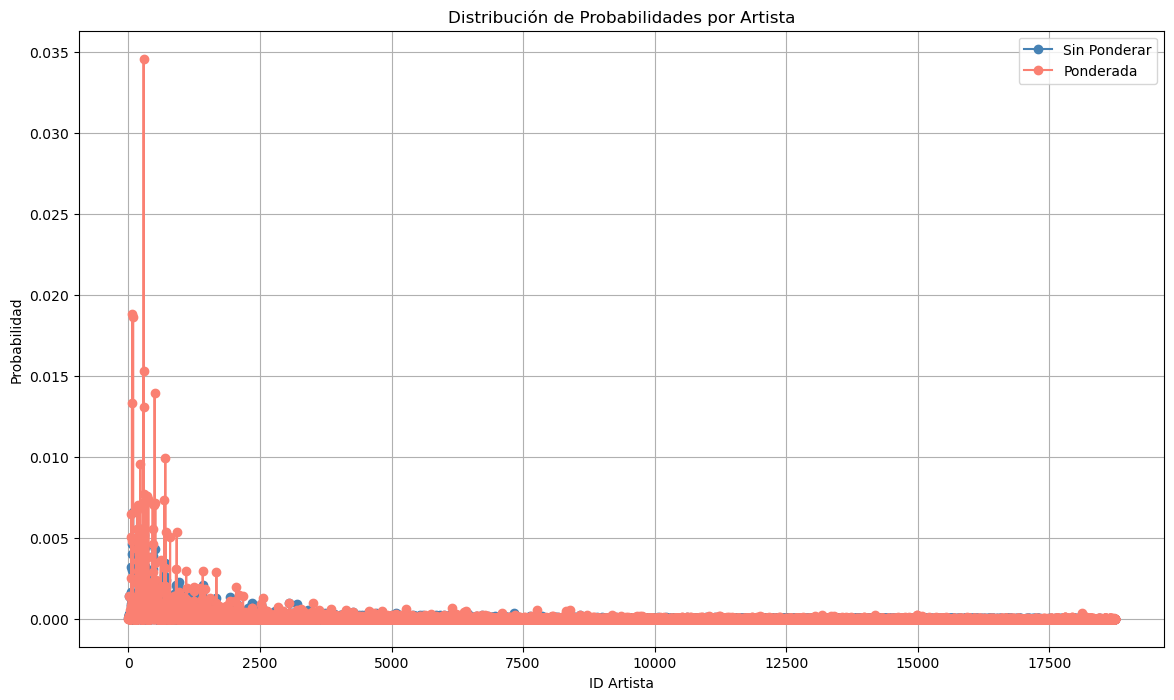

In [13]:
# Comparación probabilidades
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

plt.plot(artists['artistID'], artists['prob_sin_ponderar'], marker='o', label='Sin Ponderar', color='steelblue')
plt.plot(artists['artistID'], artists['prob_ponderada'], marker='o', label='Ponderada', color='salmon')

plt.xlabel('ID Artista')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades por Artista')
plt.legend()
plt.grid(True)
plt.show()

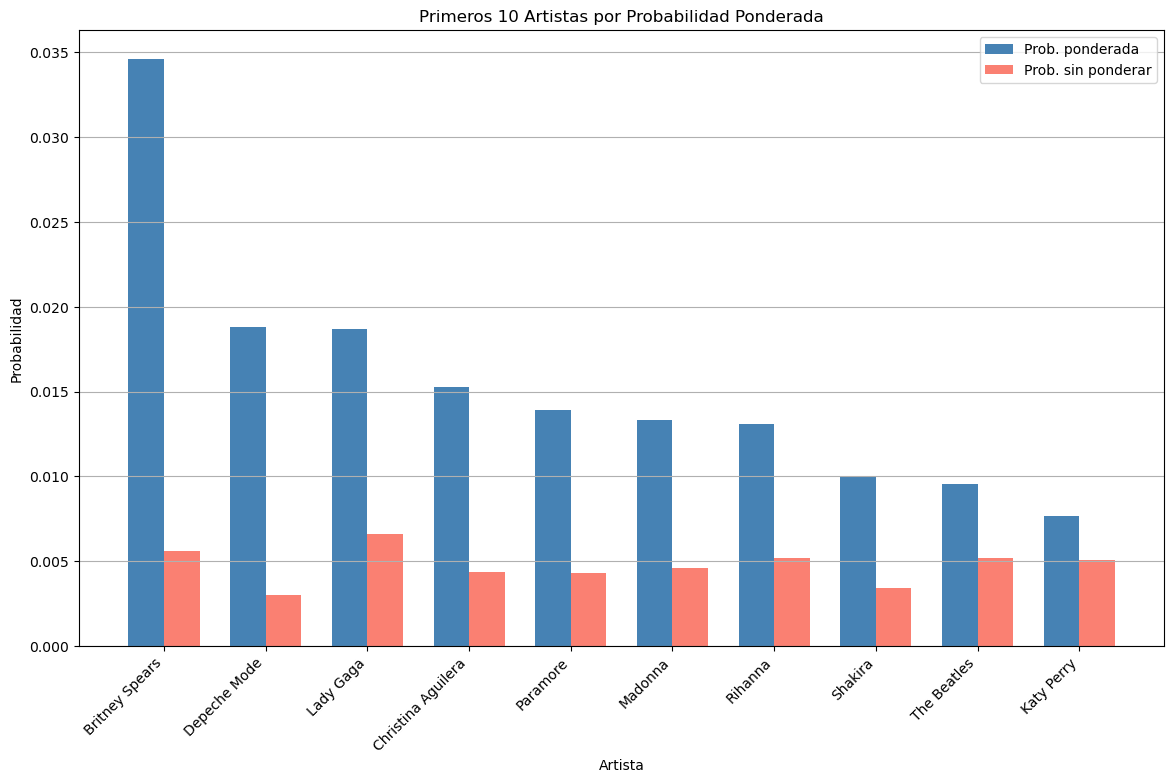

In [14]:
# prob_ponderada en orden descendente y seleccionar los primeros 10
top_10_artists = artists.sort_values(by='prob_ponderada', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists))

# prob_sin_ponderar
plt.bar(index, top_10_artists['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_ponderada
plt.bar([i + bar_width for i in index], top_10_artists['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad Ponderada')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists['artistNAME'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

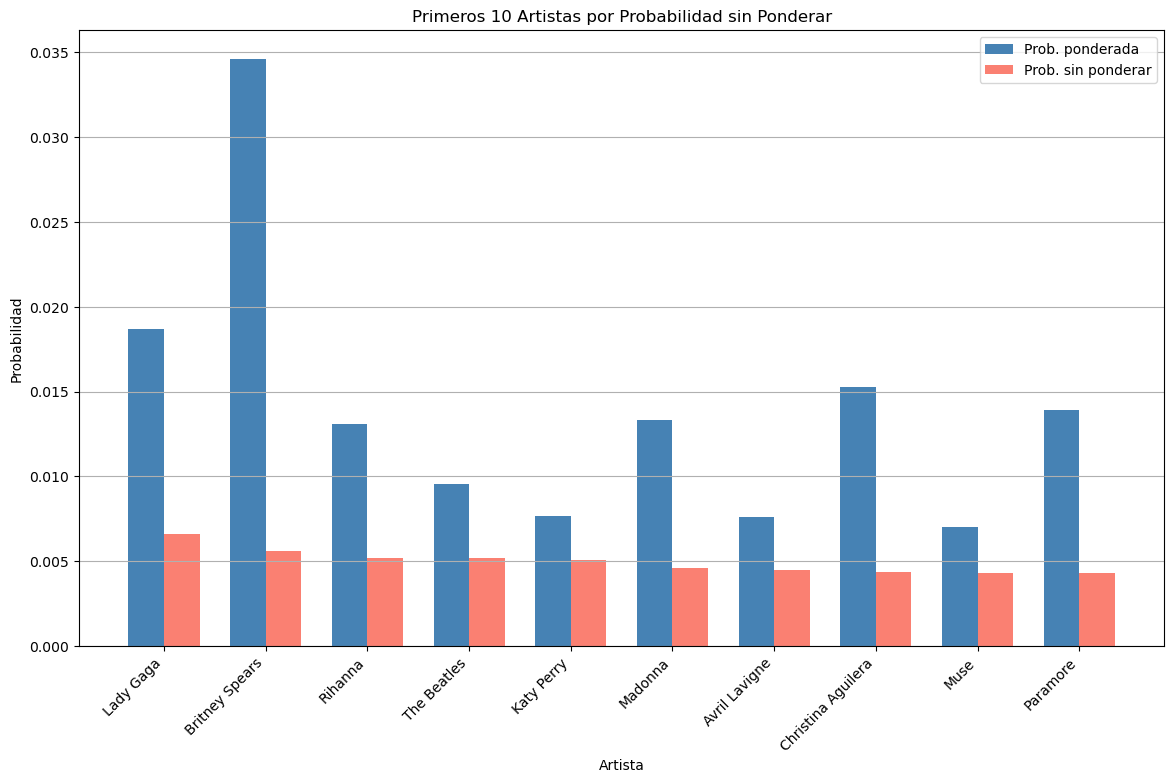

In [15]:
# prob_sin_ponderar en orden descendente y seleccionar los primeros 10
top_10_artists_np = artists.sort_values(by='prob_sin_ponderar', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# Crear gráficos de barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists_np))

# prob_poderada
plt.bar(index, top_10_artists_np['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_sin_ponderar
plt.bar([i + bar_width for i in index], top_10_artists_np['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad sin Ponderar')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists_np['artistNAME'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

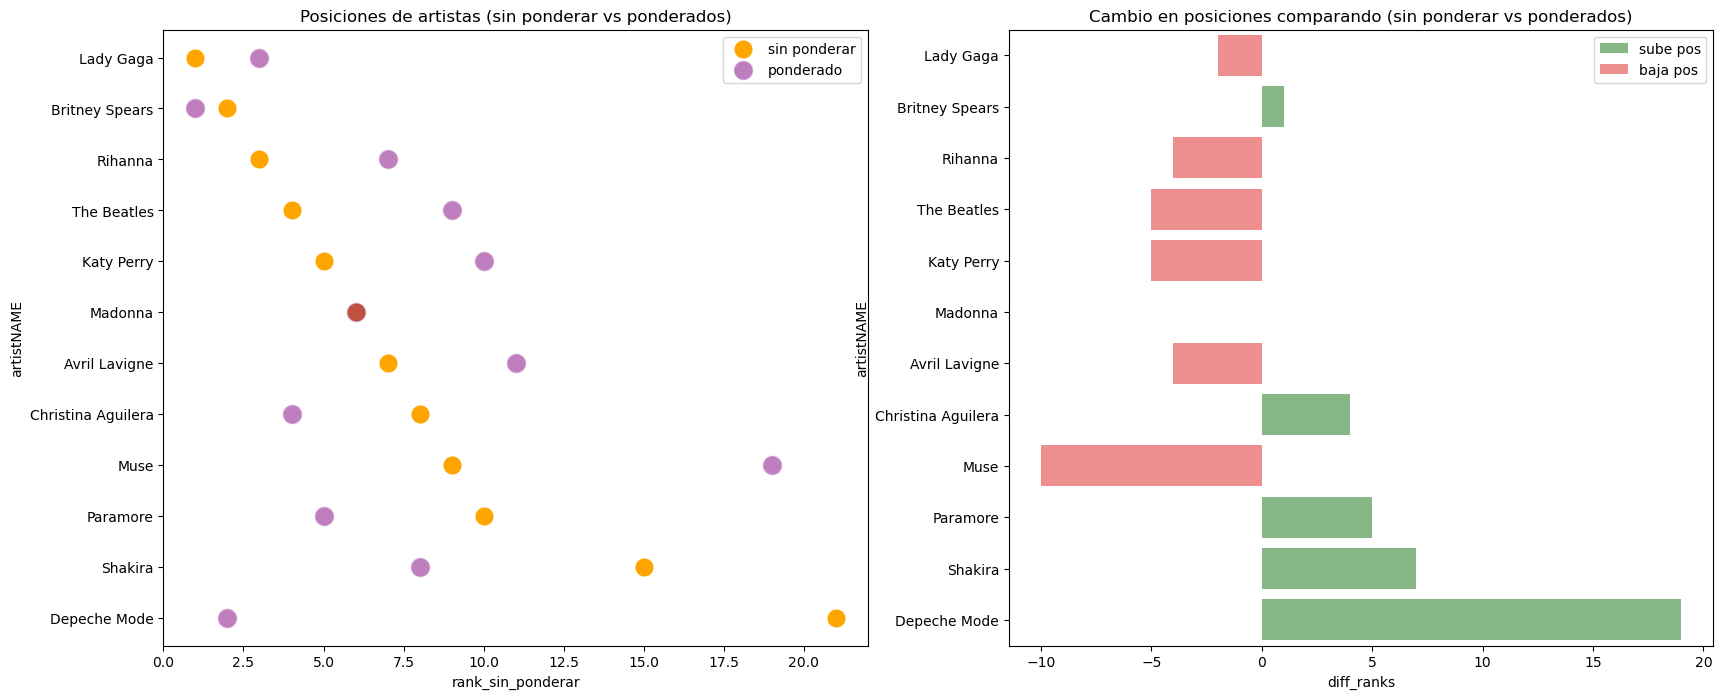

In [16]:
# calculo de posiciones segun probabilidades sin ponderar y ponderadas
artists["rank_sin_ponderar"] = artists["prob_sin_ponderar"].rank(method="min", ascending=False)
artists["rank_ponderada"] = artists["prob_ponderada"].rank(method="min", ascending=False)
# calculo de cambio de posiciones
artists["diff_ranks"] = artists["rank_sin_ponderar"] - artists["rank_ponderada"]

# condiciones para encontrar el top 10 con cada criterio
c_rank_sin_ponderar = artists["rank_sin_ponderar"] <= 10
c_rank_ponderado = artists["rank_ponderada"] <= 10

# encontrar todos los artistas que estan en uno u otro top 10
data = artists[c_rank_sin_ponderar|c_rank_ponderado].sort_values(by="rank_sin_ponderar")

# graficar
fig, ax = plt.subplots(1,2,figsize = (20,8))
axs=ax.flatten()

# frafica de posiciones en el ranking para cada metrica elegida
sns.scatterplot(data=data, y="artistNAME", x="rank_sin_ponderar", ax=ax[0], color = "orange", s=200, label="sin ponderar")
sns.scatterplot(data=data, y="artistNAME", x="rank_ponderada", ax=ax[0], color="purple", s=200, alpha=0.5, label="ponderado")
ax[0].set_title("Posiciones de artistas (sin ponderar vs ponderados)")

# graficas de cambio de posiciones
c = data["diff_ranks"] >= 0
sns.barplot(data=data, y="artistNAME", x="diff_ranks", color="white", alpha=1, ax=ax[1])
sns.barplot(data=data[c], y="artistNAME", x="diff_ranks", color="g", alpha=0.5, ax=ax[1],label="sube pos")
sns.barplot(data=data[~c], y="artistNAME", x="diff_ranks", color="r", alpha=0.5, ax=ax[1],label="baja pos")
ax[1].set_title("Cambio en posiciones comparando (sin ponderar vs ponderados)")

plt.show()

In [ ]:
c_rank_personas = artists["rank_sin_ponderar"] <= 10
c_rank_ponderado = artists["rank_ponderada"] <= 10

result_rank = pd.merge(artists.loc[c_rank_personas,["artistNAME","rank_sin_ponderar"]] , artists.loc[c_rank_ponderado,["artistNAME","rank_ponderada"]],
                       left_on="rank_sin_ponderar", right_on="rank_ponderada")\
                .sort_values(by="rank_sin_ponderar").reset_index()

result_rank.rename(columns={"artistNAME_x":"artista_no_ponderado","artistNAME_y":"artista_ponderado"},inplace = True)
result_rank[["artista_no_ponderado","artista_ponderado"]]

,artista_no_ponderado,artista_ponderado
0,Lady Gaga,Britney Spears
1,Britney Spears,Depeche Mode
2,Rihanna,Lady Gaga
3,The Beatles,Christina Aguilera
4,Katy Perry,Paramore
5,Madonna,Madonna
6,Avril Lavigne,Rihanna
7,Christina Aguilera,Shakira
8,Muse,The Beatles
9,Paramore,Katy Perry


De esta manera podemos ver por el id artista que la prob ponderada es mas alta que sin ponderar

Lo que podemos inferir a partir de la comparacion entre las probabilidades ponderada y sin ponderar es que la probabilidad ponderada por el número de reproducciones ajusta la probabilidad original (sin ponderar) para reflejar el impacto de la popularidad o el volumen de reproducciones. Si un artista tiene muchas reproducciones, su probabilidad ponderada será más alta en comparación con su probabilidad sin ponderar, y viceversa.

En el caso de artistas con menos reproducciones, la probabilidad ponderada es más baja que la probabilidad sin ponderar. Esto indica que, aunque tengan cierto peso en términos de frecuencia o presencia en los datos sin considerar las reproducciones, son menos populares cuando se tiene en cuenta el número de veces que sus canciones han sido escuchadas.

 La diferencia entre ambas probabilidades también nos permite comparar la popularidad relativa de los artistas. Si la probabilidad ponderada es mucho más baja que la sin ponderar, esto indica que el artista, aunque presente en la muestra, tiene un menor número de reproducciones en comparación con otros. Por el contrario, una probabilidad ponderada más cercana a la sin ponderar sugiere una mayor popularidad.

 Todos estos fenomenos se hacen evidentes al comparar el top 10 de artistas en ambos casos, se ve que son distintos. Adicionalmente se puede analizar el cambio de posiciones al tener en cuenta una u otra medida de popularidad, por ejemplo Depeche Mode se ve beneficiado al tener en cuenta el numero de reproducciones ya que pasa de estar por fuera del top 20 a estar de número 2.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [ ]:
# Utilice este espacio para escribir el código.
df_8 = df[df['userID'] == 8].copy()
print("cantidad de artistas escuchados por el user 8: {}".format(len(df_8)))
df_8.head(3)

cantidad de artistas escuchados por el user 8: 50


,userID,artistID,nro_reproducciones,artistNAME
1975,8,71,181,Dido
2752,8,89,921,Lady Gaga
3453,8,97,354,Duffy


In [ ]:
total_reproducciones_8 = df_8['nro_reproducciones'].sum()  # Total reproducciones
df_8.loc[:,'porcentaje rep/total'] = df_8['nro_reproducciones']/total_reproducciones_8
df_8 = df_8.sort_values(by='porcentaje rep/total', ascending=False)
df_8.head(10)

,userID,artistID,nro_reproducciones,artistNAME,porcentaje rep/total
18981,8,334,6291,No Angels,0.173406
18986,8,335,2396,Sandy,0.066044
12634,8,289,2258,Britney Spears,0.062240
18988,8,336,1735,Vanessa Petruo,0.047824
14200,8,295,1425,Beyoncé,0.039279
18989,8,337,1407,Alexander,0.038783
14597,8,296,1039,Sugababes,0.028639
18990,8,338,963,Queensberry,0.026544
2752,8,89,921,Lady Gaga,0.025387
18992,8,339,819,Fady Maalouf,0.022575


,userID,artistID,nro_reproducciones,artistNAME,porcentaje rep/total
18981,8,334,6291,No Angels,0.173406
18986,8,335,2396,Sandy,0.066044
12634,8,289,2258,Britney Spears,0.062240
18988,8,336,1735,Vanessa Petruo,0.047824
14200,8,295,1425,Beyoncé,0.039279
18989,8,337,1407,Alexander,0.038783
14597,8,296,1039,Sugababes,0.028639
18990,8,338,963,Queensberry,0.026544
2752,8,89,921,Lady Gaga,0.025387
18992,8,339,819,Fady Maalouf,0.022575


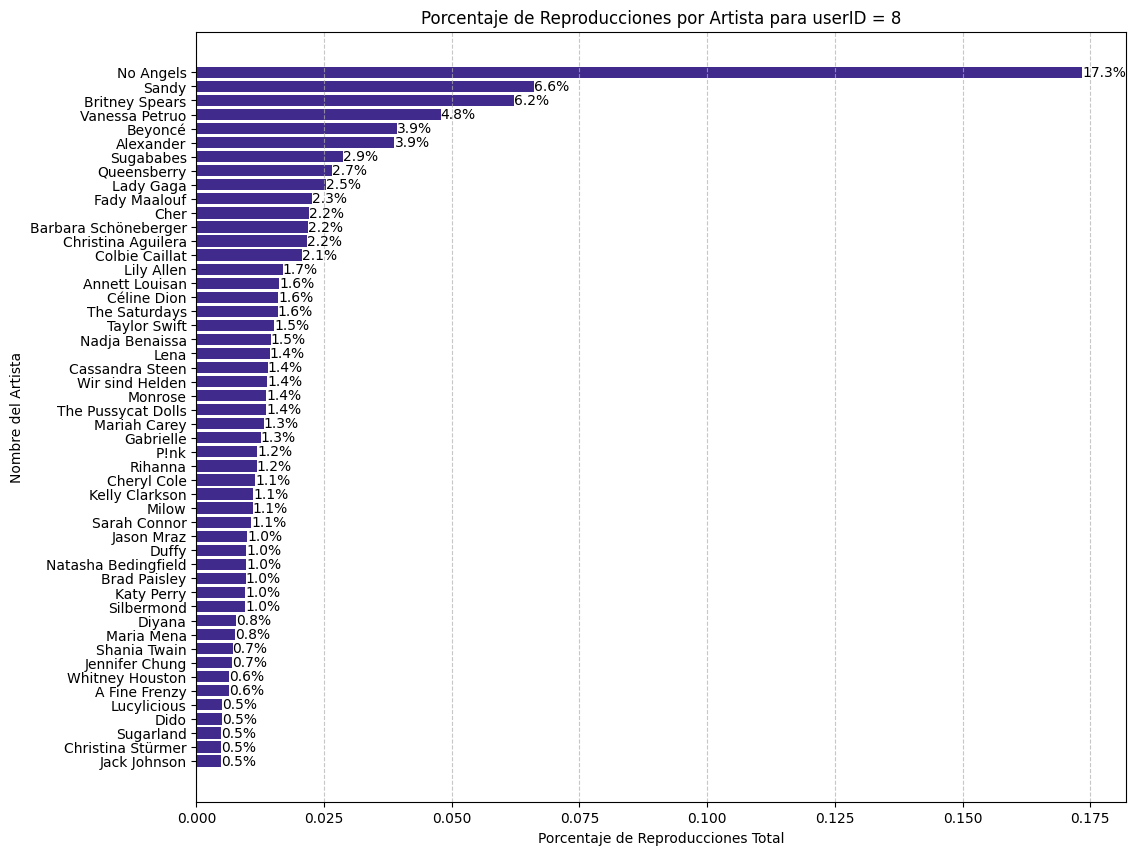

In [ ]:
display(df_8.head(10))
df_8_sorted = df_8.sort_values(by='porcentaje rep/total', ascending=True)

plt.figure(figsize=(12, 10))

# Crear el gráfico de barras horizontales
plt.barh(df_8_sorted['artistNAME'], df_8_sorted['porcentaje rep/total'], color='#402B8C')

# Configurar etiquetas y título
plt.xlabel('Porcentaje de Reproducciones Total')
plt.ylabel('Nombre del Artista')
plt.title('Porcentaje de Reproducciones por Artista para userID = 8')

# Mostrar los valores en las barras en formato de porcentaje
for index, value in enumerate(df_8_sorted['porcentaje rep/total']):
    plt.text(value, index, f'{value*100:.1f}%', va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Vemos entonces la distribucion de artistas para el usuario 8 basado unicamente en el numero de reproducciones relativas. Por ejemplo No Angels es el artista con mayor numero de reproducciones en su lista de escucha. El 17% de las reproducciones del ususario son de este artista.

Vemos que lo que mas escucha este usuario es Pop Aleman: No Angels, Vanessa Petruo, Queensberry. Y tambien el pop de EEUU como Beyonce y Britney Spears. Podemos decir que es un usuario que prefiere la musica pop. Siendo No Angels su artista favorito con una diferencia muy grande.



### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [ ]:
# Contar el número de userIDs distintos que han escuchado cada artistID
artist_user_counts_df = df.groupby('artistID')['userID'].nunique().reset_index()
artist_user_counts_df.rename(columns={'userID': 'user_count'}, inplace=True)

# calculo de promedio de escucha por el total de usuarios
artist_user_counts_df['promedio_users'] = artist_user_counts_df['user_count']/artist_user_counts_df['user_count'].sum()
artist_user_counts_df = artist_user_counts_df.sort_values(by='promedio_users', ascending=False)
artist_user_counts_df.head(3)

,artistID,user_count,promedio_users
83,89,611,0.006582
283,289,522,0.005623
282,288,484,0.005214


In [ ]:
# Unir la cuenta de usuarios de vuelta al DataFrame original
df = df.merge(artist_user_counts_df, on='artistID', how='left')

# Mostrar el DataFrame actualizado
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users
0,2,51,13883,Duran Duran,111,0.001196
1,4,51,228,Duran Duran,111,0.001196
2,27,51,85,Duran Duran,111,0.001196


In [ ]:
# df_8 simple
df_8_simple = df[df['userID'] == 8].copy()
df_8_simple = df_8_simple.sort_values(by='promedio_users', ascending=False)
df_8_simple.head(10)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users
2752,8,89,921,Lady Gaga,611,0.006582
12634,8,289,2258,Britney Spears,522,0.005623
12150,8,288,428,Rihanna,484,0.005214
15151,8,300,347,Katy Perry,473,0.005095
13505,8,292,783,Christina Aguilera,407,0.004384
14200,8,295,1425,Beyoncé,397,0.004276
15772,8,302,432,P!nk,305,0.003285
13245,8,291,402,Kelly Clarkson,260,0.002801
19120,8,344,553,Taylor Swift,247,0.002661
14699,8,298,613,Lily Allen,243,0.002618


In [ ]:
# Obtener la lista de artistID que el usuario 8 ya tiene en su lista de preferencias de acuerdo a su numero de reps
user8_preferred_artist_ids = df_8['artistID'].unique() # df_8 calculado en el punto 2.3

artist_user_counts_df = artist_user_counts_df.merge(artists[['artistID', 'artistNAME']], on='artistID', how='left')
# Filtrar result_df para excluir estos artistIDs
artist_user_counts_df_filtered = artist_user_counts_df[~artist_user_counts_df['artistID'].isin(user8_preferred_artist_ids)]

recomendations_user_8_promedio_simple = artist_user_counts_df_filtered.head(10)
recomendations_user_8_promedio_simple

,artistID,user_count,promedio_users,artistNAME
3,227,480,0.005171,The Beatles
5,67,429,0.004621,Madonna
6,333,417,0.004492,Avril Lavigne
8,190,400,0.004309,Muse
9,498,399,0.004298,Paramore
11,154,393,0.004233,Radiohead
12,65,369,0.003975,Coldplay
13,466,362,0.003899,Ke$ha
14,701,319,0.003436,Shakira
16,306,304,0.003275,Black Eyed Peas


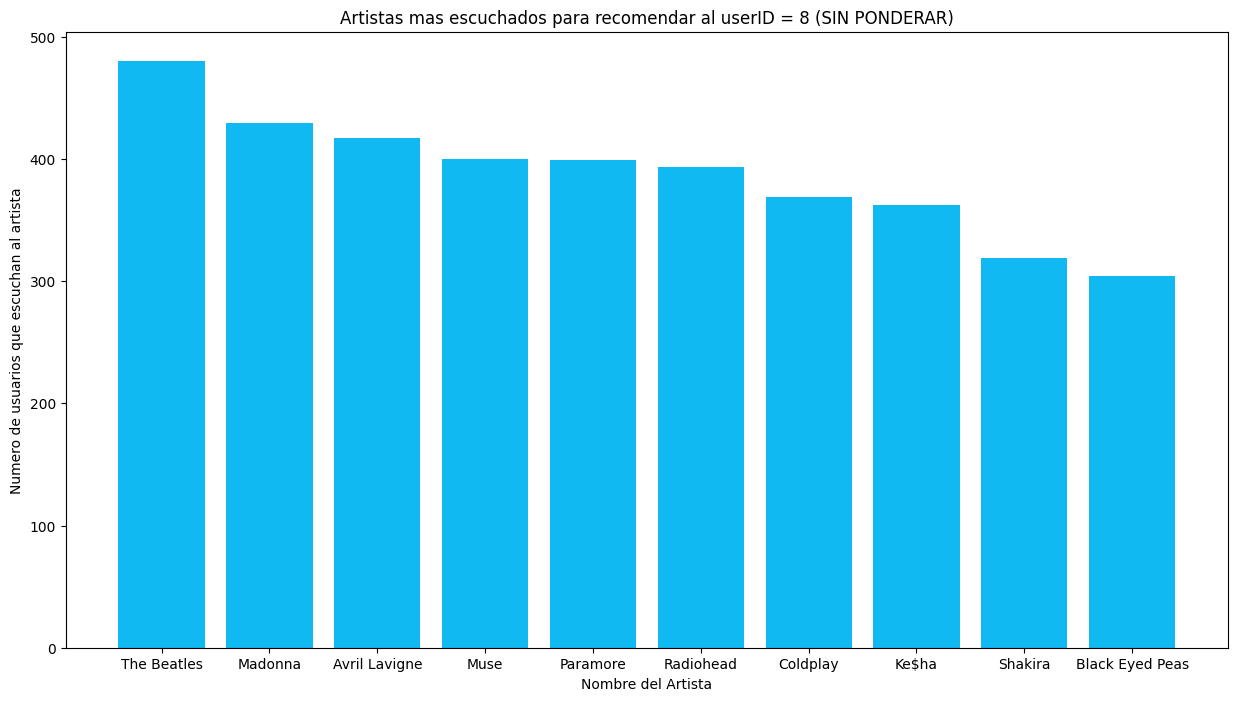

In [ ]:
df_recommendations_sorted = recomendations_user_8_promedio_simple.sort_values(by='user_count', ascending=False)

plt.figure(figsize=(15, 8))

# Crear el gráfico de barras horizontales
plt.bar(df_recommendations_sorted['artistNAME'], df_recommendations_sorted['user_count'], color='#11b9f3')

# Configurar etiquetas y título
plt.ylabel('Numero de usuarios que escuchan al artista')
plt.xlabel('Nombre del Artista')
plt.title('Artistas mas escuchados para recomendar al userID = 8 (SIN PONDERAR)')


plt.show()

En este caso se calcula inicialmente el promedio de artistas mas escuchados teniendo en cuenta unicamente el numero de usuarios que escuchan al artista divido el numero total de la base. De esta manera encontramos el promedio simple

Utilizando el promedio simple es posible encontrar el numero de usuarios que escuchan a un artista sin considerar el numero de reproducciones. De esta forma hariamos un conteo de cuantos usuarios escuchan al artista sin importar el numero de veces. Asi tenemos un grupo que sera recomendados por popularidad.

Sin embargo, posterior a esto quitamos los artistas que el ususario 8 ya escucha o ha escuchado antes para encontrar nuevos artistas para recomendarle. De esta manera encontramos que los 10 artistas que podrian ser recomendados por su popularidad en la base (sin tener en cuenta # reproducciones) son:


| Artista          | # usuarios que escuchan al artista | Promedio de usuarios |
|------------------|-----------------------------------|----------------------|
| The Beatles      | 480                               | 0.005171             |
| Madonna          | 429                               | 0.004621             |
| Avril Lavigne    | 417                               | 0.004492             |
| Muse             | 400                               | 0.004309             |
| Paramore         | 399                               | 0.004298             |
| Radiohead        | 393                               | 0.004233             |
| Coldplay         | 369                               | 0.003975             |
| Ke$ha            | 362                               | 0.003899             |
| Shakira          | 319                               | 0.003436             |
| Black Eyed Peas  | 304                               | 0.003275             |


Vemos que son probabilidades bajas de igual manera debido al tamaño de la base pero estos son los top 10 artistas que mas numero de usuarios han escuchado


#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [ ]:
# Contar el número de userIDs distintos que han escuchado cada artistID
nro_repro_counts = df.groupby('artistID')['nro_reproducciones'].sum().reset_index()
artist_prom_repro = nro_repro_counts.copy()
artist_prom_repro.rename(columns={'nro_reproducciones': 'total_artist_rep'}, inplace=True)
artist_prom_repro['prom_rep'] = artist_prom_repro['total_artist_rep']/total_reproducciones
artist_prom_repro.head(3)

,artistID,total_artist_rep,prom_rep
0,1,771,0.000011
1,2,8012,0.000116
2,3,775,0.000011


In [ ]:
# Unir la prom_rep al DataFrame original
df = df.merge(artist_prom_repro, on='artistID', how='left')

# Mostrar el DataFrame actualizado
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043


In [ ]:
df['prom_user_rep_ponderado'] = df['promedio_users']*df['prom_rep']
df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043,0.000006
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043,0.000006
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043,0.000006


In [ ]:
artist_ponderado_df = df.groupby('artistID')['prom_user_rep_ponderado'].unique().reset_index()
artist_ponderado_df = artist_ponderado_df.merge(artists[['artistID', 'artistNAME']], on='artistID', how='left')
artist_ponderado_df = artist_ponderado_df.sort_values(by='prom_user_rep_ponderado', ascending=False)
artist_ponderado_df.head(10)

,artistID,prom_user_rep_ponderado,artistNAME
283,289,[0.0001945028790740446],Britney Spears
83,89,[0.00012285279623151666],Lady Gaga
282,288,[6.823140425893239e-05],Rihanna
286,292,[6.707083566849638e-05],Christina Aguilera
61,67,[6.153152857032972e-05],Madonna
492,498,[5.9853431098781074e-05],Paramore
66,72,[5.713689469304975e-05],Depeche Mode
221,227,[4.948376611000471e-05],The Beatles
294,300,[3.921975511561863e-05],Katy Perry
695,701,[3.419797144907949e-05],Shakira


In [ ]:
artist_ponderado_df['prom_user_rep_ponderado'] = artist_ponderado_df['prom_user_rep_ponderado'].astype(float)

In [ ]:
artist51_data = artist_ponderado_df[artist_ponderado_df['artistID'] == 51]

# Mostrar los datos encontrados
print(artist51_data)

    artistID  prom_user_rep_ponderado   artistNAME
45        51                 0.000006  Duran Duran


In [ ]:
# Resultados recomendacion
# Filtrar result_df para excluir estos artistIDs
artist_ponderado_df_filtered = artist_ponderado_df[~artist_ponderado_df['artistID'].isin(user8_preferred_artist_ids)]

recomendations_user_8_promedio_ponderado = artist_ponderado_df_filtered.head(10)
recomendations_user_8_promedio_ponderado

,artistID,prom_user_rep_ponderado,artistNAME
61,67,0.000062,Madonna
492,498,0.000060,Paramore
66,72,0.000057,Depeche Mode
221,227,0.000049,The Beatles
695,701,0.000034,Shakira
327,333,0.000034,Avril Lavigne
184,190,0.000030,Muse
148,154,0.000024,Radiohead
455,461,0.000022,Miley Cyrus
460,466,0.000022,Ke$ha


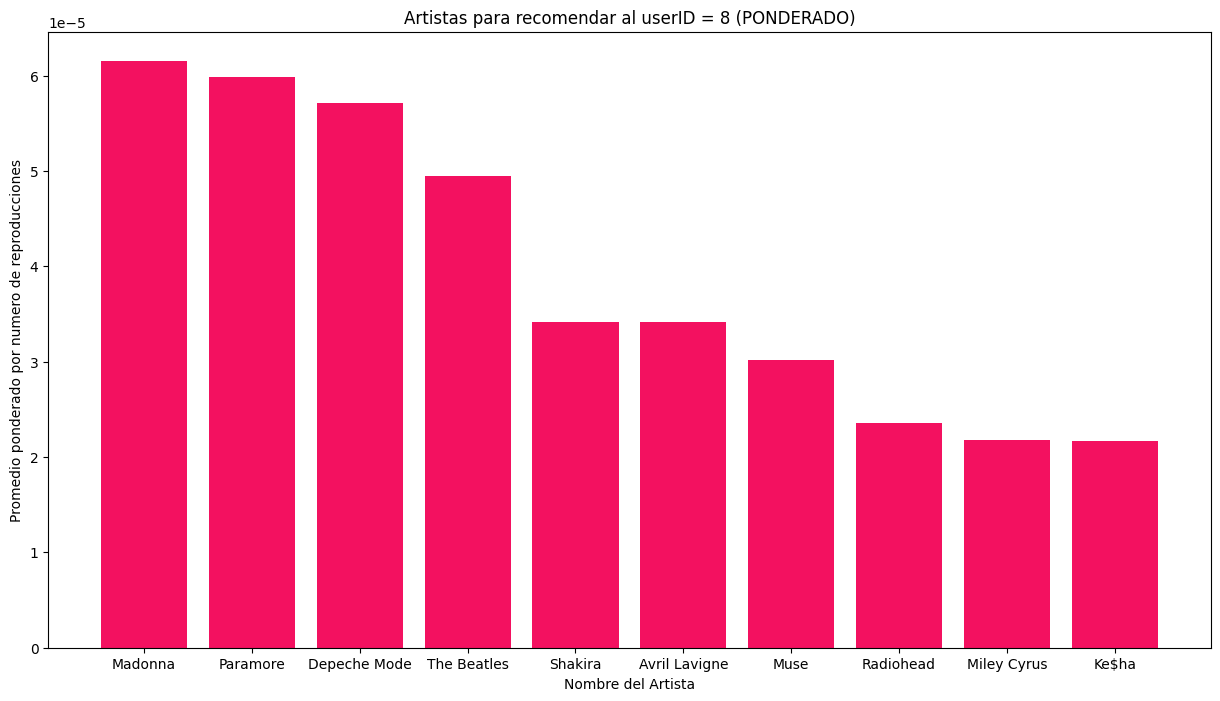

In [ ]:
df_recommendations_sorted = recomendations_user_8_promedio_ponderado.sort_values(by='prom_user_rep_ponderado', ascending=False)

plt.figure(figsize=(15, 8))

# Crear el gráfico de barras horizontales
plt.bar(df_recommendations_sorted['artistNAME'], df_recommendations_sorted['prom_user_rep_ponderado'], color='#f31160')

# Configurar etiquetas y título
plt.ylabel('Promedio ponderado por numero de reproducciones')
plt.xlabel('Nombre del Artista')
plt.title('Artistas para recomendar al userID = 8 (PONDERADO)')


plt.show()

En este caso vamos a calcular el promedio ponderado por el numero de reproducciones. Tomamos el numero de usuarios que escuchan al artista y se multiplica o pondera por el % de numero de reproducciones en la base. De esta forma cada promedio está ponderada por el peso del % de reproducciones para asi considerar la variable de cantidad de reproducciones.

Cuando se utiliza el promedio ponderado basado en el número de usuarios que escuchan a un artista, ponderando por el número de veces que estos usuarios reproducen al artista, los resultados pueden cambiar significativamente debido a cómo se da mayor importancia a el numero de reproducciones y no solo si mas usuarios han escuchado al artista.

Por ejemplo antes teniamos la siguiente tabla:

### **Promedio sin ponderar**

| Artista          | # usuarios que escuchan al artista | Promedio de usuarios |
|------------------|-----------------------------------|----------------------|
| The Beatles      | 480                               | 0.005171             |
| Madonna          | 429                               | 0.004621             |
| Avril Lavigne    | 417                               | 0.004492             |
| Muse             | 400                               | 0.004309             |
| Paramore         | 399                               | 0.004298             |
| Radiohead        | 393                               | 0.004233             |
| Coldplay         | 369                               | 0.003975             |
| Ke$ha            | 362                               | 0.003899             |
| Shakira          | 319                               | 0.003436             |
| Black Eyed Peas  | 304                               | 0.003275             |

Y ahora obtuvimos la siguiente tabla:

### **Promedio ponderado**

| Artista         | Promedio ponderado |
|-----------------|--------------------|
| Madonna         | 0.000062           |
| Paramore        | 0.000060           |
| Depeche Mode    | 0.000057           |
| The Beatles     | 0.000049           |
| Shakira         | 0.000034           |
| Avril Lavigne   | 0.000034           |
| Muse            | 0.000030           |
| Radiohead       | 0.000024           |
| Miley Cyrus     | 0.000022           |
| Ke$ha           | 0.000022           |


#### **Impacto en artistas con fans activos:**
Esta diferencia se debe a que el conteo simple de usuarios solo refleja la popularidad bruta, es decir, cuántas personas escuchan al artista. El promedio ponderado, en cambio, incorpora la intensidad con la que estos usuarios escuchan al artista. Esto significa que no solo importa cuántos usuarios escuchan al artista, sino también cuán frecuentemente lo hacen.

Artistas que tienen una base de fans más pequeña pero muy activa (es decir, sus canciones son reproducidas muchas veces por los mismos usuarios) podrían mejorar su posición en la lista porque cada usuario tiene más peso en la ponderación. Por ejemplo, un artista con menos usuarios pero con un alto promedio de reproducciones por usuario podría aparecer más alto en la lista que uno con muchos usuarios pero con menos reproducciones promedio.

#### **Reducción del Impacto de Audiencias Amplias pero Pasivas:**
Artistas populares con una audiencia grande pero pasiva (usuarios que escuchan al artista ocasionalmente) pueden ver una reducción en su ranking.

#### **Como se puede ver en nuestra base:**
En la base sin ponderar se veia a Madonna en el segundo puesto, pero ponderando por el numero de reproducciones paso a primer lugar, esto se debe a que tenemos en cuenta que no solo muchos usuarios la reproducen sino que lo hacen una mayor cantidad de veces que a los Beatles que bajo al cuarto lugar


**En resumen**, el promedio ponderado ofrece una visión más detallada del comportamiento de los oyentes, priorizando la frecuencia de las reproducciones sobre la cantidad de oyentes, lo cual puede cambiar significativamente los rankings en comparación con una métrica que solo considere el conteo de usuarios.



#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
# Total de reproducciones para cada usuario
rep_usuario = df.groupby('userID')['nro_reproducciones'].transform('sum')
# Calculo del promedio ponderado de cada artista para cada usuario
df['prom_ponderado_usuario'] = df['nro_reproducciones'] / rep_usuario

df.head(3)

,userID,artistID,nro_reproducciones,artistNAME,user_count,promedio_users,total_artist_rep,prom_rep,prom_user_rep_ponderado,prom_ponderado_usuario
0,2,51,13883,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.082276
1,4,51,228,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.008466
2,27,51,85,Duran Duran,111,0.001196,348919,0.005043,0.000006,0.014814


In [ ]:
# calculo de la matriz de relaciones entre usuarios y artistas
r_matrix = df.pivot_table(values='nro_reproducciones', index='userID', columns='artistID') # Ojo corregir JOHANNA
r_matrix.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r_matrix.shape

(1892, 17632)

In [ ]:
total_nans = r_matrix.isna().sum().sum()

In [ ]:
total_nans

33266910

In [ ]:
(r_matrix.shape[0]*r_matrix.shape[1])-total_nans

92834

In [ ]:
# se llenan de 0 los campos faltantes para poder realizar el calculo de la similaridad de coseno
r_matrix_dummy = r_matrix.copy().fillna(0)
r_matrix_dummy.head()

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Importamos cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud de coseno
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformamos la matriz resultante en un dataframe
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)

cosine_sim.head(10)

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
userID,,,,,,,,,,,,,,,,,,,,,
2,1.000000,0.0,0.144786,0.028692,0.007016,0.030219,0.008964,0.0,0.000000,0.021267,...,0.000000,0.043405,0.000000,0.004625,0.001585,0.0,0.000956,0.082134,0.000000,0.0
3,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000318,0.0
4,0.144786,0.0,1.000000,0.081193,0.006609,0.000000,0.000000,0.0,0.009072,0.013407,...,0.000000,0.000000,0.003776,0.006178,0.000000,0.0,0.045125,0.659085,0.000000,0.0
5,0.028692,0.0,0.081193,1.000000,0.000000,0.000000,0.000000,0.0,0.169078,0.004639,...,0.010993,0.000000,0.205141,0.000000,0.000000,0.0,0.204557,0.119133,0.000000,0.0
6,0.007016,0.0,0.006609,0.000000,1.000000,0.012713,0.018881,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,0.030219,0.0,0.000000,0.000000,0.012713,1.000000,0.167416,0.0,0.000000,0.247062,...,0.000000,0.001678,0.000000,0.000000,0.017636,0.0,0.000000,0.000000,0.000000,0.0
8,0.008964,0.0,0.000000,0.000000,0.018881,0.167416,1.000000,0.0,0.000000,0.187304,...,0.000000,0.000000,0.000000,0.000000,0.034826,0.0,0.000000,0.000000,0.000000,0.0
9,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.048289,0.000000,0.000000,0.000000,0.022935,0.0,0.000000,0.000000,0.005969,0.0
10,0.000000,0.0,0.009072,0.169078,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.008895,0.000000,0.109260,0.000000,0.000000,0.0,0.057869,0.110738,0.000000,0.0


In [ ]:
promedio_reps = df['nro_reproducciones'].mean()
promedio_pond_usuarios = df['prom_user_rep_ponderado'].mean()

In [ ]:
promedio_reps

745.2439300256372

In [ ]:
def cf_user_wmean(userID, artistID):

    # Primero verificamos si esta en la matriz
    if artistID in r_matrix:
        #Buscamos las medidas de similitud con los otros usuarios
        sim_scores = cosine_sim[userID]

        # Obtenemos los promedios ponderados de reproducciones no faltantes de la matriz bajo evaluación
        m_prom_rep = r_matrix[artistID]

        # Obtenemos los índicies de los artistas sin promedio ponderado de reproducciones
        idx = m_prom_rep[m_prom_rep.isnull()].index

        # Nos quedamos con similitudes
        sim_scores = sim_scores.drop(idx)

        m_prom_rep = m_prom_rep.dropna()

        if sim_scores.sum()>0 :
            # Calculamos la media ponderada
            wmean_prom_rep = np.dot(sim_scores, m_prom_rep)/ sim_scores.sum()
        else:
            wmean_prom_rep = 0
    else:
        # Si no tenemos ninguna información retornamos
        wmean_prom_rep = promedio_reps # calculado en 3.2

    return wmean_prom_rep

Algunas pruebas en las que se revisa afinidad del usuario 8 con el artista 3 y del usuario 8 con Shakira (artista 701)

In [ ]:
user_51_pred = cf_user_wmean(8, 3)
user_51_pred

0

In [ ]:
user_51_pred_shakira = cf_user_wmean(8, 701)
user_51_pred_shakira

1330.5109197088348

In [ ]:
# calculo de user_wmean para todos los artistas
artists_user8 = artists.copy()
user_id = 8

# Aplicar la función a cada artista
artists_user8['cf_wmean_result'] = artists_user8['artistID'].apply(lambda artistID: cf_user_wmean(user_id, artistID))

result_df = artists_user8[['artistID', 'artistNAME', 'cf_wmean_result']]
result_df = result_df.sort_values(by='cf_wmean_result', ascending=False)

result_df.head(10)

,artistID,artistNAME,cf_wmean_result
8115,8308,Johnny Hallyday,32990.000000
6241,6373,Tyler Adam,30614.000000
17093,18121,Rytmus,23462.000000
1532,1541,The Devil Wears Prada,17097.666227
1182,1191,Hadouken!,13330.754741
2632,2652,The Classic Crime,12754.274950
9130,9363,X-Ray Dog,12091.000000
17094,18122,Kontrafakt,10726.000000
8173,8366,Holdcut,10574.000000
8088,8281,RoBERT,9615.000000


In [ ]:
# Filtrar result_df para excluir estos artistas preferidos usuario 8
result_df_filtered = result_df[~result_df['artistID'].isin(user8_preferred_artist_ids)]

recomendations_user_8_cos = result_df_filtered.head(10)
recomendations_user_8_cos

,artistID,artistNAME,cf_wmean_result
8115,8308,Johnny Hallyday,32990.000000
6241,6373,Tyler Adam,30614.000000
17093,18121,Rytmus,23462.000000
1532,1541,The Devil Wears Prada,17097.666227
1182,1191,Hadouken!,13330.754741
2632,2652,The Classic Crime,12754.274950
9130,9363,X-Ray Dog,12091.000000
17094,18122,Kontrafakt,10726.000000
8173,8366,Holdcut,10574.000000
8088,8281,RoBERT,9615.000000


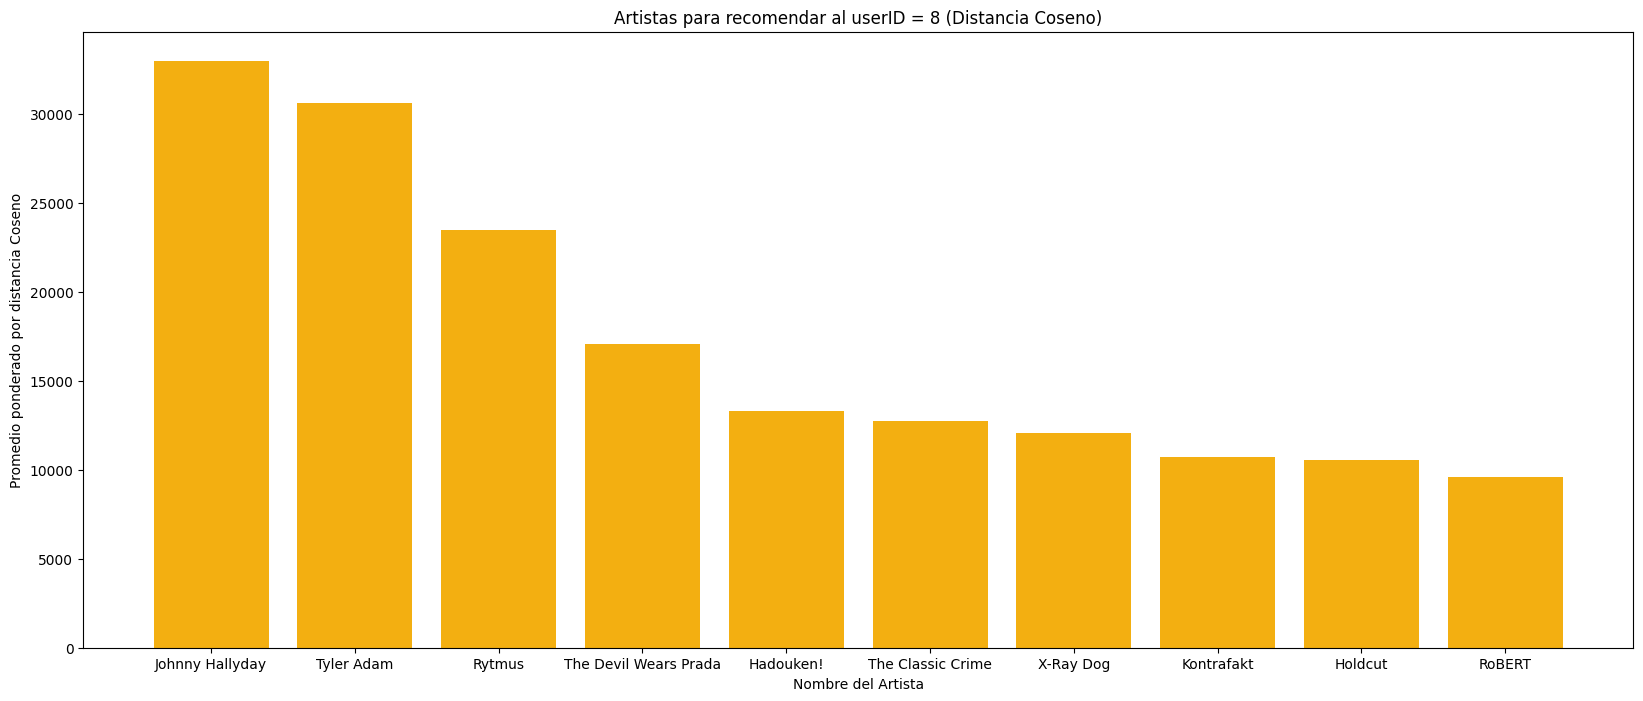

In [ ]:
df_recommendations_sorted = recomendations_user_8_cos.sort_values(by='cf_wmean_result', ascending=False)

plt.figure(figsize=(20, 8))

# Crear el gráfico de barras horizontales
plt.bar(df_recommendations_sorted['artistNAME'], df_recommendations_sorted['cf_wmean_result'], color='#f3af11')

# Configurar etiquetas y título
plt.ylabel('Promedio ponderado por distancia Coseno')
plt.xlabel('Nombre del Artista')
plt.title('Artistas para recomendar al userID = 8 (Distancia Coseno)')


plt.show()

Para hacer filtrado colaborativo sencillo pero con similitud de coseno primero se crea la matriz r que tiene como valores el numero de reproducciones, filas cada usuario y columnas los artistas, en caso de que no se tenga informacion en la matriz inicialmente se cambia con 0. A partir de esta matriz se calcula la similitud de coseno usando la libreria de SKlearn.

Con esta nueva matriz de similitud de coseno pasamos a realizar la funcion recomendadora basada en promedios ponderados. Cuando no se tiene informacion en el algortimo que se definio cf_user_wmean() se toma el promedio de reproducciones igual a 745.

Aplicamos este algoritmo para todos los artistas comparados con el ususario 8 y encontramos los artistas recomendados gracias a este algoritmo.  


### **Similitud Coseno**

| Artista                  | Media con Similitud Coseno |
|--------------------------|-----------------|
| Johnny Hallyday          | 32990.000000    |
| Tyler Adam               | 30614.000000    |
| Rytmus                   | 23462.000000    |
| The Devil Wears Prada    | 17097.666227    |
| Hadouken!                | 13330.754741    |
| The Classic Crime        | 12754.274950    |
| X-Ray Dog                | 12091.000000    |
| Kontrafakt               | 10726.000000    |
| Holdcut                  | 10574.000000    |
| RoBERT                   | 9615.000000     |

Estos serian los 10 artistas recomendados para el ususario tomando en cuenta la similitud de coseno la cual se usa para medir cuán similares son dos usuarios o dos artistas  en términos de sus patrones de interacción.

#### **Comparacion con medias ponderadas:**
En este caso en el que tomamos similitud de cosenos a diferencia de la media ponderada tenemos en cuenta la cercania entre otros usuarios que podrian escuchar lo mismo mas que su popularidad que se calculo antes. Recordemos:


#### **Promedio Ponderado:**

| Artista         | Promedio ponderado |
|-----------------|--------------------|
| Madonna         | 0.000062           |
| Paramore        | 0.000060           |
| Depeche Mode    | 0.000057           |
| The Beatles     | 0.000049           |
| Shakira         | 0.000034           |
| Avril Lavigne   | 0.000034           |
| Muse            | 0.000030           |
| Radiohead       | 0.000024           |
| Miley Cyrus     | 0.000022           |
| Ke$ha           | 0.000022           |


En el caso anterior tomamos el promedio ponderado y esto nos traia los artistas mas populares teniendo en cuenta tanto el numero de usuarios que los escuchan como el numero de reproducciones. Pero en este caso trae artistas que pueden acomodarse mas a los gustos del usuario pues el modelo determino que otros artistas o usuarios tenian relaciones similares con los del usuario 8 y genera una recomendacion mas cercana a sus preferencias individuales.


#### **Ventajas de similitud Coseno:**

- Las recomendaciones son más precisas porque consideran la similitud entre usuarios, adaptando las sugerencias a los patrones de comportamiento específicos.

- Da más peso a los usuarios con preferencias muy similares, lo que reduce el impacto de usuarios con gustos muy diferentes.

- El sistema de medias ponderadas solo considera la popularidad global. La similitud de coseno puede ofrecer una mayor variedad si identifica que el usuario tiene gustos específicos, mientras que la media ponderada por reproducciones puede seguir recomendando principalmente los artistas más populares.




#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código. JOHANNA
A_df = df.pivot(index = 'userID', columns ='artistID', values = 'nro_reproducciones').fillna(0)
A_df.head(3)

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
A = A_df.to_numpy()
user_count_ponderado_mean = np.mean(A, axis = 1)
A_demeaned = A - user_count_ponderado_mean.reshape(-1, 1)

Primero encontramos la matriz de calificaciones que en este caso son el numero de reporducciones y le sacamos la media, recordemos que esta matriz esta incompleta pues no todos los usuarios escuchan todos los artistas

In [ ]:
# Descomposicion Valores Singulares para encontrar el K optimo
from scipy.linalg import svd
U, S, Vt = svd(A_demeaned)

In [ ]:
K=1000 # Iniciarlo con un valor arbitrario

In [ ]:
U2 = U[:, 0:K]
Vt2 = Vt[0:K, :]
S2 = np.resize(S,[K,1])*np.eye(K,K) #ponemos los valores singulares en una matriz diagonal

Al usar SVD obtenemos una aproximacion de la matriz de recomendacion sin valores faltantes si multiplicamos U x S x Vt. Pero primero debemos determinar cuantas componentes usar de la matriz S que expliquen suficiente varianza y nos reduzca la dimensionalidad

In [ ]:
print(f"Tamaño Matriz U2  (columnas son los primeros {K} eigen vectores de 𝑋𝑇𝑋):", U2.shape)
print(f"Tamaño Matriz S2  (valores en la diagonal = primeros {K} valores singulares):",
      S2.shape)
print(f"Tamaño Matriz V𝑇2 (columnas son los primeros {K} eigen vectores de 𝑋𝑋𝑇):", Vt2.shape)

Tamaño Matriz U2  (columnas son los primeros 1000 eigen vectores de 𝑋𝑇𝑋): (1892, 1000)
Tamaño Matriz S2  (valores en la diagonal = primeros 1000 valores singulares): (1000, 1000)
Tamaño Matriz V𝑇2 (columnas son los primeros 1000 eigen vectores de 𝑋𝑋𝑇): (1000, 17632)


##### **Reduccion Dimensionalidad:**

In [ ]:
# Varianza Explicada
varianza_total = np.sum(S**2)
varianza_explicada = np.sum(S2**2)
proporcion_varianza = varianza_explicada/varianza_total
print(f"Proporción de la varianza representada por los primeros K={K} valores singulares: {proporcion_varianza:.4f}")

Proporción de la varianza representada por los primeros K=1000 valores singulares: 0.9994


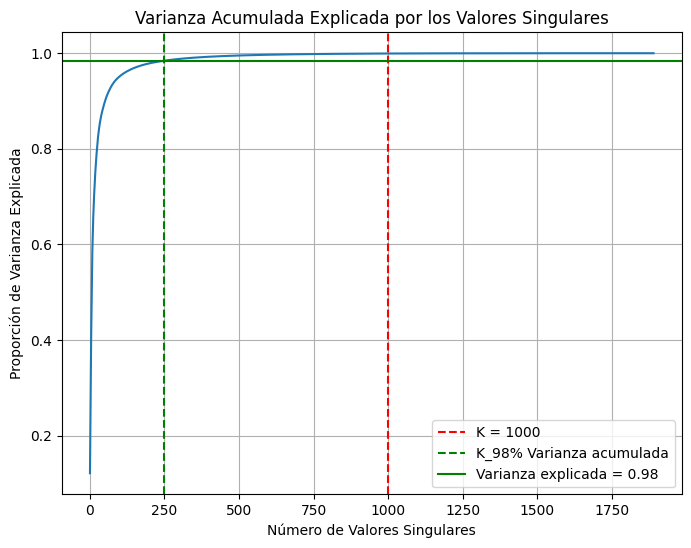

Numero de Valores Singulares para los cuales se explica al menos el 9844% de la varianza acumulada:  250


In [ ]:
# Visualizar la varianza explicada acumulada
varianza_explicada_acumulada1 = np.cumsum(S**2) / varianza_total
K_9844 = np.where(varianza_explicada_acumulada1 >= 0.9844)[0][0]


plt.figure(figsize=(8, 6))
plt.plot(varianza_explicada_acumulada1)
plt.axvline(x=K, color='r', linestyle='--', label=f'K = {K}')
plt.axvline(x=K_9844, color='g', linestyle='--', label="K_98% Varianza acumulada")
plt.axhline(y=0.9844, color='g', linestyle='-', label='Varianza explicada = 0.98')


plt.title('Varianza Acumulada Explicada por los Valores Singulares')
plt.xlabel('Número de Valores Singulares')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)
plt.legend()
plt.show()

print("Numero de Valores Singulares para los cuales se explica al menos el 9844% de la varianza acumulada: ", K_9844)


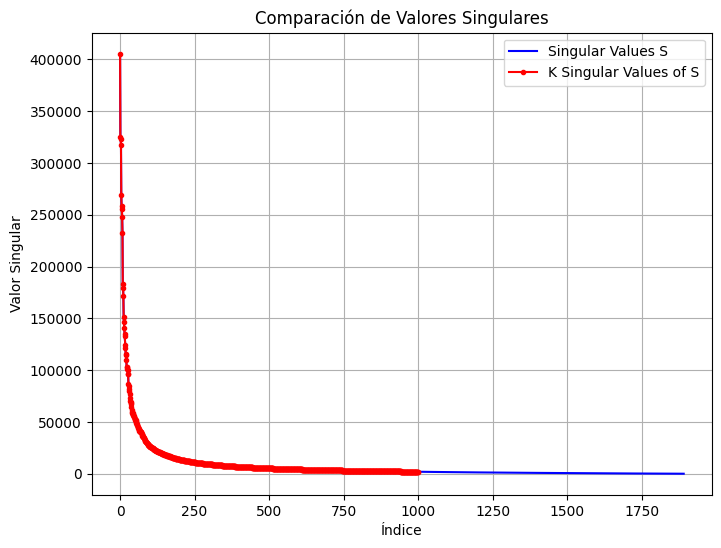

In [ ]:
# Graficar los valores singulares
plt.figure(figsize=(8, 6))

# Plot for S
plt.plot(S, label='Singular Values S', color='blue')

# Plot for S2
plt.plot(np.diag(S2), label='K Singular Values of S', color='red', marker='.')

plt.title('Comparación de Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')

plt.grid(True)
plt.legend()

plt.show()

In [ ]:
# utilizamos svds para obtener las recomendaciones finales
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(A_demeaned, k = 250)

In [ ]:
# Transformacion en matriz identidad con sigmas en sy diagonal
sigma = np.diag(sigma)
A_recomendaciones = np.dot(np.dot(U, sigma), Vt)

In [ ]:
# se añade la media que se habia restado incialmente
A_recomendaciones = np.dot(np.dot(U, sigma), Vt) + user_count_ponderado_mean.reshape(-1, 1)

In [ ]:
A_recomendaciones_df = pd.DataFrame(A_recomendaciones, index=A_df.index, columns=A_df.columns)
A_recomendaciones_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.881080,-10.199239,0.421102,-0.606821,-3.141024,-2.016513,-43.300613,-2.861553,-15.631465,-9.758615,...,-1.788180,-1.139761,-0.830797,-0.771850,-0.651923,-0.613302,-0.599074,-0.584845,-0.582812,1.314400
3,0.378681,1.108595,-1.776862,0.292679,0.274241,4.470428,83.976217,-12.519148,8.076123,-3.271254,...,-0.489886,-0.261517,-0.152702,-0.131942,-0.089704,-0.076102,-0.071091,-0.066080,-0.065364,1.185511
4,0.216929,9.685483,0.152539,0.525767,3.724361,22.513795,-32.934146,-5.664537,9.687245,15.240429,...,0.627726,0.484615,0.416424,0.403414,0.376945,0.368421,0.365281,0.362140,0.361692,0.209007
5,0.468592,0.671035,0.006048,0.242142,0.594971,-2.423682,18.738992,0.509251,1.421643,4.408656,...,1.140052,0.719583,0.519235,0.481010,0.403243,0.378200,0.368973,0.359747,0.358429,1.152339
6,0.049514,0.092750,0.035670,0.033927,0.046252,0.101133,1.407749,0.090725,0.079596,-0.012958,...,0.033733,0.034202,0.034426,0.034469,0.034556,0.034584,0.034594,0.034604,0.034606,0.057239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.264196,-0.010133,0.411530,0.241051,0.219177,0.125570,-2.546850,0.314439,-0.039298,-0.204314,...,0.283706,0.278341,0.275785,0.275298,0.274305,0.273986,0.273868,0.273751,0.273734,0.508232
2096,0.347205,21.957047,-0.667957,0.666925,8.716971,46.403801,-16.750495,2.235607,29.650531,-6.519373,...,0.418290,0.178941,0.064894,0.043135,-0.001134,-0.015390,-0.020642,-0.025894,-0.026644,-1.378870
2097,1.634462,2.853445,0.056445,0.059709,1.044796,3.001833,30.037563,0.194631,4.019747,1.856876,...,-0.186357,-0.075338,-0.022438,-0.012345,0.008188,0.014801,0.017237,0.019673,0.020021,-1.600857


In [ ]:
user_id = 8
recomendaciones_svd = A_recomendaciones_df.loc[user_id]

# Filtrar artistas que el usuario ya ha escuchado
recomendaciones_svd = recomendaciones_svd[~recomendaciones_svd.index.isin(user8_preferred_artist_ids)]

# Ordenar las recomendaciones y seleccionar las 10 mejores
top_10_svd = recomendaciones_svd.sort_values(ascending=False).head(10)

# Convertir a DataFrame para combinar con nombres de artistas
top_10_svd = top_10_svd.reset_index()
top_10_svd.columns = ['artistID', 'predicted_reproduction']

# Unir con el DataFrame de artistas para obtener los nombres
top_10_svd = pd.merge(top_10_svd, artists, on='artistID')

# Seleccionar las columnas deseadas y ordenar por la predicción
top_10_svd = top_10_svd[['artistID', 'artistNAME', 'predicted_reproduction']]

# Mostrar las 10 recomendaciones con nombre del artista
top_10_svd

,artistID,artistNAME,predicted_reproduction
0,906,Girls Aloud,418.635789
1,913,Destiny's Child,354.536111
2,293,Ashlee Simpson,344.805393
3,3748,Hanson,326.110542
4,279,Brandy,258.615413
5,542,Pitty,248.332018
6,1451,Girlicious,212.451983
7,332,Kelly Rowland,206.224993
8,13735,Vitamin C,193.241660
9,1934,Adele,187.807213


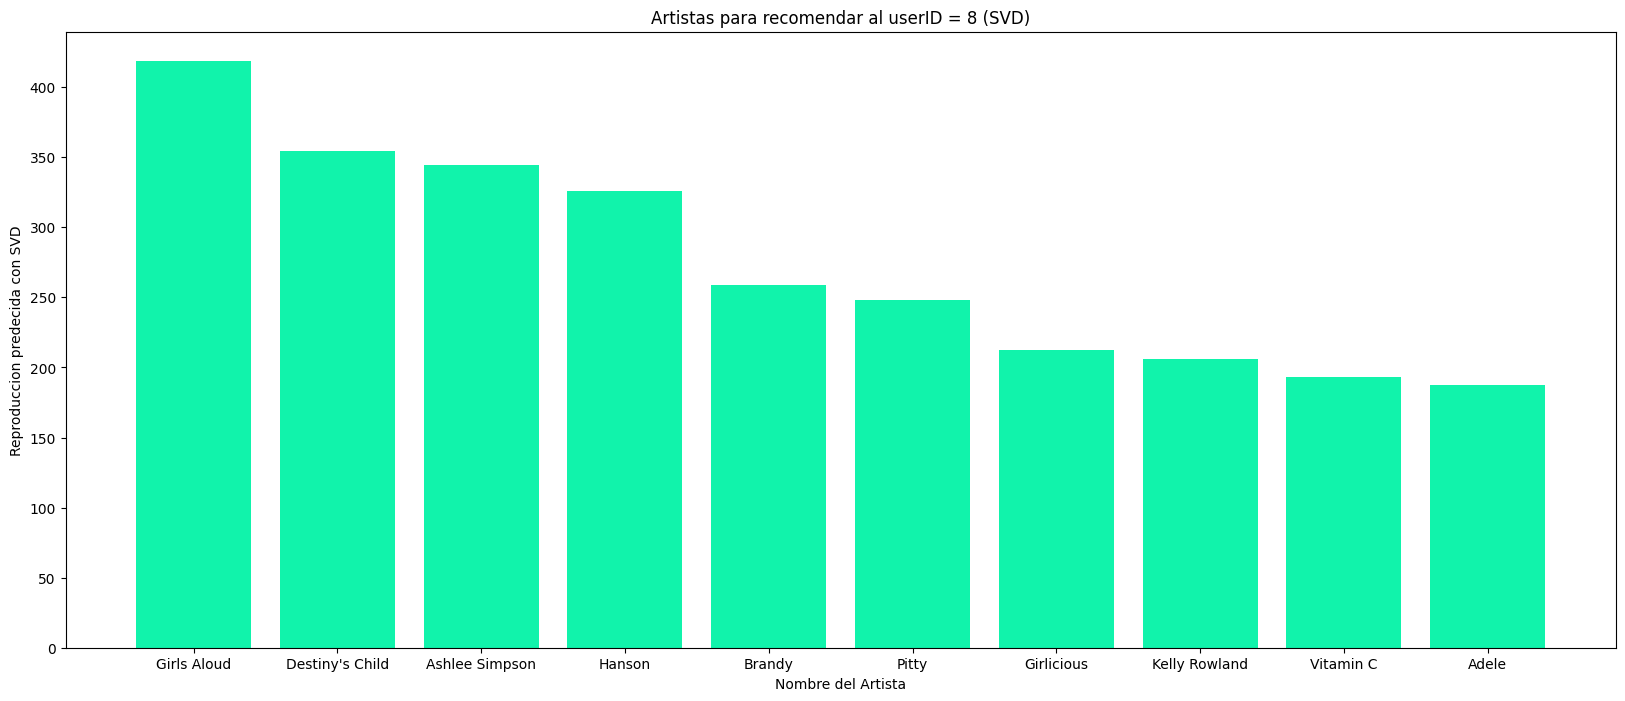

In [ ]:
df_recommendations_sorted = top_10_svd.sort_values(by='predicted_reproduction', ascending=False)

plt.figure(figsize=(20, 8))

# Crear el gráfico de barras horizontales
plt.bar(top_10_svd['artistNAME'], top_10_svd['predicted_reproduction'], color='#11f3ab')

# Configurar etiquetas y título
plt.ylabel('Reproduccion predecida con SVD')
plt.xlabel('Nombre del Artista')
plt.title('Artistas para recomendar al userID = 8 (SVD)')


plt.show()

#### Nota:  se prueba tambien con K = 100 que explica el 95.13% de la varianza, con K= 95 se explica 94.86% y se observan variaciones en las recomendaciones

#### **Procedimiento**

Para realizar recomendacion con SVD construimos la matriz A a partir de una matriz de preferencias de los usuarios, en este caso la matrriz que tiene artistas y usuarios y el nuemro de reproducciones.Esta matriz, llamada matriz de calificaciones, está normalmente incompleta, ya que no todos los usuarios escuchan a todos los artistas.

 A esta matriz se le quita la media y calculamos las matrices de SVD U Vt y S. Para cualquier celda que no tenga un valor (una calificación faltante), se puede estimar utilizando la descomposición de U*S*Vt. De esta forma, obtenemos una matriz completa donde se pueden predecir las puntuaciones faltantes.Pero antes determinamos que el numero de componentes a usar para reducir la dimensionalidad seran 250. A partir de esto obtenemos la matriz de recomendacion A multiplicando U x S x Vt tomando solo las primeras 250 componentes de S y sumandole la media. Ahora tendremos un puntaje de recomendacion con SVD para cada usuario y cada artista.

Despues filtramos para el usuario 8 y tomamos los 10 valores mas altos de la matriz que nos diran que tanta probabilidad hay que le gustaria ese artista. De esta manera encontramos las 10 recomendaciones:

#### **Recomendacion SVD:**
| artistNAME        | predicted_reproduction |
|-------------------|------------------------|
| Girls Aloud       | 418.635789              |
| Destiny's Child   | 354.536111              |
| Ashlee Simpson    | 344.805393              |
| Hanson            | 326.110542              |
| Brandy            | 258.615413              |
| Pitty             | 248.332018              |
| Girlicious        | 212.451983              |
| Kelly Rowland     | 206.224993              |
| Vitamin C         | 193.241660              |
| Adele             | 187.807213              |

Estas recomendaciones parecen mucho mas reales que las encontradas anteriormente, pues teniamos los artistas que mas escucha el usuario 8

#### **Artistas mas escuchados por el usuario 8:**

| artistNAME        | nro_reproducciones |
|-------------------|--------------------|
| No Angels         | 6291               |
| Sandy             | 2396               |
| Britney Spears    | 2258               |
| Vanessa Petruo    | 1735               |
| Beyoncé           | 1425               |
| Alexander         | 1407               |
| Sugababes         | 1039               |
| Queensberry       | 963                |
| Lady Gaga         | 921                |
| Fady Maalouf      | 819                |


Vemos que suele escuchar mucho pop, y tambien vemos que escucha Beyonce, y en este caso con SVD se le recomienda escuchar la grupacion donde canto Beyonce antes llamada Destiny's Child, asi como otros artistas del genero pop. Lo que seria mucho mas acertado


## **Comparacion con otros modelos:**

### **Promedio sin ponderar**

| Artista          | # usuarios que escuchan al artista | Promedio de usuarios |
|------------------|-----------------------------------|----------------------|
| The Beatles      | 480                               | 0.005171             |
| Madonna          | 429                               | 0.004621             |
| Avril Lavigne    | 417                               | 0.004492             |
| Muse             | 400                               | 0.004309             |
| Paramore         | 399                               | 0.004298             |
| Radiohead        | 393                               | 0.004233             |
| Coldplay         | 369                               | 0.003975             |
| Ke$ha            | 362                               | 0.003899             |
| Shakira          | 319                               | 0.003436             |
| Black Eyed Peas  | 304                               | 0.003275             |

El promedio sin ponderar unicamente nos daba informacion de popularidad por numero de usuarios sin tener en cuenta que algunos usurarios pudieron reproducirlo una sola vez, y como vemos son artistas muy populares.


### **Promedio ponderado**

| Artista         | Promedio ponderado |
|-----------------|--------------------|
| Madonna         | 0.000062           |
| Paramore        | 0.000060           |
| Depeche Mode    | 0.000057           |
| The Beatles     | 0.000049           |
| Shakira         | 0.000034           |
| Avril Lavigne   | 0.000034           |
| Muse            | 0.000030           |
| Radiohead       | 0.000024           |
| Miley Cyrus     | 0.000022           |
| Ke$ha           | 0.000022           |

El promedio ponderado nos tomaba en cuenta tanto popularidad de numero de usuarios pero tenia en cuenta reproducciones, lo que nos daba los artistas mas populares y mas escuchados.

Sin embargo estos dos metodos no se acercaban a recomendar algo que fuera mas personalizado para el ususario 8. Por esto se paso a usar otros metodos:


### **Similitud Coseno**

| Artista                  | Media con Similitud Coseno |
|--------------------------|-----------------|
| Johnny Hallyday          | 32990.000000    |
| Tyler Adam               | 30614.000000    |
| Rytmus                   | 23462.000000    |
| The Devil Wears Prada    | 17097.666227    |
| Hadouken!                | 13330.754741    |
| The Classic Crime        | 12754.274950    |
| X-Ray Dog                | 12091.000000    |
| Kontrafakt               | 10726.000000    |
| Holdcut                  | 10574.000000    |
| RoBERT                   | 9615.000000     |

En la similitud de coseno se tenia en cuenta la similitud de artistas y usuarios en un espacio vectorial. Se basa únicamente en la información explícita de los usuarios y artistas (las puntuaciones conocidas), midiendo la cercanía angular entre dos vectores de características, pero este no es capaz de descubrir relaciones subyacentes entre usuarios y productos que no estén directamente reflejadas en los datos. Por esta razon si dos usuarios nunca habian escuchado los mismos artistas la similitud de coseno no podia capturar esta informacion. Para estos casos se uso el promedio.

SVD, sin embargo, puede descubrir que ambos usuarios prefieren géneros similares, basándose en los factores latentes. SVD funciona muy bien en matrices de calificaciones donde hay muchos valores faltantes, que es un caso típico en sistemas de recomendación. Al factorizar la matriz original en componentes latentes, puede estimar o "reconstruir" estos valores faltantes, prediciendo cómo un usuario podría calificar un producto que aún no ha evaluado.






#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
#!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5953 sha256=81dd48de83908902d4ec292a0118b34ae239dcd9e96caf5a7339ce434b715c49
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
from apyori import apriori

records = []
for i in df['userID'].unique():
    records.append(list(df[df['userID'] == i]['artistNAME'].values))

records[1]

['Duran Duran',
 'Air',
 'Röyksopp',
 'Coldplay',
 'Moby',
 'Depeche Mode',
 'George Michael',
 'Deep Forest',
 'Porcupine Tree',
 'De/Vision',
 'Radiohead',
 'Robbie Williams',
 'VAST',
 'Michael Jackson',
 'עברי לידר',
 'The Cure',
 'אביב גפן',
 'Enrique Iglesias',
 'God Is an Astronaut',
 'Pink Floyd',
 'יוני בלוך',
 'Planet Funk',
 'The Cranberries',
 'Scissor Sisters',
 'דניאל סלומון',
 'אביתר בנאי',
 'Mew',
 'Stereophonics',
 'Garbage',
 'Placebo',
 'Infected Mushroom',
 'Delerium',
 'Scorpions',
 'Rock Star Supernova',
 "Dolores O'Riordan",
 'Tommy Lee',
 'Roxette',
 'Paradise Lost',
 'Keane',
 'Jamiroquai',
 'James Blunt',
 'Reamonn',
 'Blackfield',
 'a-ha',
 'Opeth',
 'Poets of the Fall',
 'Muse',
 'OneRepublic',
 'Elton John',
 'Tears for Fears']

In [ ]:
artists_sorted = artists.sort_values(by='prob_sin_ponderar', ascending=False)
# display(artists_sorted.head(5))
# display(artists_sorted.tail(5))
# Obtener el valor del cuartil 75 de la columna 'prob_ponderada'
# valor_25_1 = artists_sorted['prob_ponderada'].quantile(0.25)

valor_25_2 = artists_sorted['prob_sin_ponderar'].quantile(0.25)

# print(valor_25_1, valor_25_2)

# print(f"{valor_25_1:.20f}")
print(f"{valor_25_2:.20f}")

0.00001077191546200745


In [ ]:
desc_df = df.groupby(["artistID","artistNAME"])[["userID"]].count().reset_index()
desc_df.rename(columns = {"userID":"cant_personas"}, inplace=True)
desc_df["support"] = desc_df["cant_personas"]/desc_df["cant_personas"].sum()
desc_df.describe()

,artistID,cant_personas,support
count,17632.000000,17632.000000,17632.000000
mean,9156.636853,5.265086,0.000057
std,5392.515296,20.620315,0.000222
min,1.000000,1.000000,0.000011
25%,4501.750000,1.000000,0.000011
50%,9048.500000,1.000000,0.000011
75%,13769.250000,3.000000,0.000032
max,18745.000000,611.000000,0.006582


De la base inicial **tan solo el 25%** de los artistas  son escuchados por mas de 3 personas, por lo tanto estableceremos un limite de escuchas para los artistas para asi acotar el problema y que tome mayor relevancia las sugerencias encontradas

In [ ]:
c = desc_df["cant_personas"] > 100
desc_df[c].describe()

,artistID,cant_personas,support
count,125.000000,125.000000,125.000000
mean,504.320000,198.472000,0.002138
std,383.145988,103.898879,0.001119
min,7.000000,103.000000,0.001110
25%,229.000000,126.000000,0.001357
50%,352.000000,157.000000,0.001691
75%,689.000000,241.000000,0.002596
max,1934.000000,611.000000,0.006582


limitando a que al menos existan 100 personas que oyen al artista encontramos que el valor minimo del support debe ser de aproximadamente **0.001110**. Para nuestro ejercicio lo redondearemos a **0.001**, al aplicar este minimo de support vemos que el numero mínimo de escuchas sera de 93

In [ ]:
c = desc_df["support"] > 0.001
desc_df[c].describe()

,artistID,cant_personas,support
count,136.000000,136.000000,136.000000
mean,514.779412,190.183824,0.002049
std,380.493261,103.450629,0.001114
min,7.000000,93.000000,0.001002
25%,232.250000,122.500000,0.001320
50%,415.000000,150.500000,0.001621
75%,701.750000,233.500000,0.002515
max,1934.000000,611.000000,0.006582


ahora una vez seleccionado el valor mínimo de support, establecemos que el  nivel minimo de confianza debe ser de 50% es decir que el artista sugerido debe estar presente al menos la mitad de las veces. Por ultimo el lift será 5 ya que consideramos que debe ser 5 veces mas probable escuchar en conjunto el artista sugerido con el artista analizado, que escuchar cada uno por a parte

In [ ]:
association_rules = apriori(records, min_support=0.001, min_confidence=0.5, min_lift=5,max_length=2)
association_results = list(association_rules)

In [ ]:
print("Derivamos {} reglas de asociación.".format(len(association_results)))

Derivamos 39196 reglas de asociación.


In [ ]:
def recomendar_artistas(usuario, df_usuarios_artistas, results_apriori):
    # 1. Obtener los datos del usuario
    artistas_usuario = df_usuarios_artistas[df_usuarios_artistas['userID'] == usuario]

    # Ordenar por número de reproducciones de mayor a menor y seleccionar los 30 primeros
    sorted_artistas = artistas_usuario.sort_values(by='nro_reproducciones', ascending=False)['artistNAME'].tolist()

    # 2. Lista de artistas ya escuchados por el usuario
    artistas_escuchados = set(artistas_usuario['artistNAME'].tolist())

    # Total de reproducciones del usuario
    total_reproducciones = artistas_usuario['nro_reproducciones'].sum()

    # Calcular las reproducciones por artista y la probabilidad de cada antecedent
    prob_antecedentes = {}
    for artista in sorted_artistas:
        reproducciones_artista = artistas_usuario[artistas_usuario['artistNAME'] == artista]['nro_reproducciones'].sum()
        prob_antecedentes[artista] = reproducciones_artista / total_reproducciones

    recomendaciones = []  # Aquí guardaremos todas las recomendaciones

    # 3. Iterar sobre los 30 artistas más escuchados
    for artista in sorted_artistas:
        # Lista temporal para almacenar recomendaciones para el artista actual
        recomendaciones_artista = []

        # 4. Buscar en la lista de reglas de asociación (results_apriori)
        for regla in results_apriori:
            antecedents = list(regla.ordered_statistics[0].items_base)  # Los antecedentes de la regla
            consequent = list(regla.ordered_statistics[0].items_add)[0]  # El consequent de la regla
            lift = regla.ordered_statistics[0].lift  # El lift de la regla

            # Verificar si el antecedent es el artista que estamos iterando
            if artista in antecedents:
                # Si el consequent no ha sido ya escuchado por el usuario
                if consequent not in artistas_escuchados:
                    # Calcular la métrica ponderada
                    probabilidad_antecedente = prob_antecedentes[artista]
                    metrica_ponderada = lift * probabilidad_antecedente
                    recomendaciones_artista.append((consequent, metrica_ponderada))

        # Ordenar las recomendaciones por la métrica ponderada de mayor a menor
        recomendaciones_artista.sort(key=lambda x: x[1], reverse=True)

        # Añadir las recomendaciones ordenadas a la lista principal
        recomendaciones.extend(recomendaciones_artista)

    # 5. Eliminar recomendaciones duplicadas y mantener el máximo de métrica ponderada para cada consequent
    recomendaciones_dict = {}
    for rec in recomendaciones:
        consequent, metrica_ponderada = rec
        if consequent not in recomendaciones_dict or metrica_ponderada > recomendaciones_dict[consequent]:
            recomendaciones_dict[consequent] = metrica_ponderada

    # Convertir el diccionario a una lista de tuplas y ordenar por métrica ponderada de mayor a menor
    recomendaciones_unicas = sorted(recomendaciones_dict.items(), key=lambda x: x[1], reverse=True)

    # Generar el texto final
    artistas_recomendados = [rec[0] for rec in recomendaciones_unicas]
    mensaje = "En base a tus preferencias musicales te sugerimos que descubras estos artistas: " + ", ".join(artistas_recomendados)

    print(mensaje)

    return artistas_recomendados

In [ ]:
recomendaciones_usuario8 = recomendar_artistas(8, df, association_results)

En base a tus preferencias musicales te sugerimos que descubras estos artistas: t.A.T.u., Ashlee Simpson, Jennifer Lopez, Die Ärzte, Keith Urban, Amy Macdonald, Miranda Lambert, Girls Aloud, Leona Lewis, The All-American Rejects, Carrie Underwood, Kate Nash, Lady Antebellum, Nelly Furtado


In [ ]:
recomendaciones_usuario8_Top10 = recomendaciones_usuario8[0:10]
recomendaciones_usuario8_Top10

['t.A.T.u.',
 'Ashlee Simpson',
 'Jennifer Lopez',
 'Die Ärzte',
 'Keith Urban',
 'Amy Macdonald',
 'Miranda Lambert',
 'Girls Aloud',
 'Leona Lewis',
 'The All-American Rejects']

In [ ]:
# Comparacion de las parejas recomendadas
artistas_usuario2 = df[df['userID'] == 8]
top_20_artistas_8 = artistas_usuario2.sort_values(by='nro_reproducciones', ascending=False)['artistNAME'].head(20).tolist()
artistas_escuchados_8 = set(artistas_usuario2['artistNAME'].tolist())


recomendaciones_ya_escuchadas = []
recomendaciones_no_escuchadas = []

for artista in artistas_escuchados_8:
    for regla in association_results:
        # Obtener antecedentes (items_base) y consecuentes (items_add) de la regla
        antecedents = list(regla.ordered_statistics[0].items_base)
        consequent = list(regla.ordered_statistics[0].items_add)[0]
        lift = regla.ordered_statistics[0].lift

        # Verificar si el artista está en los antecedentes de la regla
        if artista in antecedents and lift > 2:
            print(f"Artista: {antecedents}, Recomendación: {consequent}, Lift: {lift}")

            # Verificar si el artista ya fue escuchado
            if consequent in artistas_escuchados_8:
                print("Ya escuchado")
                recomendaciones_ya_escuchadas.append(consequent)
            else:
                print("No escuchado")
                recomendaciones_no_escuchadas.append(consequent)
print(f"Cantidad de artistas sugeridos ya escuchados por el usuario: {len(recomendaciones_ya_escuchadas)}")
print(f"Cantidad de artistas sugeridos no escuchados por el usuario: {len(recomendaciones_no_escuchadas)}")

Artista: ['Céline Dion'], Recomendación: Mariah Carey, Lift: 5.074182775022771
Ya escuchado
Artista: ['No Angels'], Recomendación: Ashlee Simpson, Lift: 8.868749999999999
No escuchado
Artista: ['No Angels'], Recomendación: Jennifer Lopez, Lift: 5.431578947368421
No escuchado
Artista: ['No Angels'], Recomendación: Mariah Carey, Lift: 7.850622406639004
Ya escuchado
Artista: ['No Angels'], Recomendación: Monrose, Lift: 87.32307692307693
Ya escuchado
Artista: ['No Angels'], Recomendación: Sugababes, Lift: 14.014814814814814
Ya escuchado
Artista: ['No Angels'], Recomendación: The Pussycat Dolls, Lift: 6.496137339055794
Ya escuchado
Artista: ['No Angels'], Recomendación: The Saturdays, Lift: 18.92
Ya escuchado
Artista: ['No Angels'], Recomendación: t.A.T.u., Lift: 10.511111111111111
No escuchado
Artista: ['Queensberry'], Recomendación: Sugababes, Lift: 23.358024691358025
Ya escuchado
Artista: ['Queensberry'], Recomendación: The Pussycat Dolls, Lift: 8.120171673819742
Ya escuchado
Artista: ['

### **Procedimiento:**

Primero se crea una lista de listas para poder utilizar la libreria a priori, donde se tendra los artistas que escucha cada usuario. Posterior a esto se usa la libreria pasandole *records* que es nuestra lista de usuarios y artistas que escucha, un min_support

Aplica el algoritmo Apriori a la lista *records* (que son nuestra lista de usuarios y artistas que escucha). El algoritmo busca reglas de asociación entre los artistas que aparecen juntos en las listas de usuarios.

**min_support** (0.001): Este valor indica el soporte mínimo. El soporte mide cuántas veces un conjunto de ítems (en este caso, artistas) aparece en las transacciones totales. Un min_support=0.001 significa que se buscan reglas donde un conjunto de artistas aparece en al menos el 0.1% de las listas de usuarios. Como se explico arriba este valor se elige al determinar un numero mínimo de escuchas para cada artista que en nuestro caso fue de 93


**min_confidence** (0.5): El mínimo nivel de confianza de las reglas de asociación. La confianza indica qué tan frecuentemente las reglas son verdaderas. Una confianza de 0.5 significa que se aceptan reglas donde el 50% de las veces que un conjunto de artistas aparece, se cumple la regla.

**min_lift** (5): El lift mide la fuerza de una regla de asociación, calculando cuán dependiente es un ítem de otro en la regla. Un lift de 5 significa que la relación entre los artistas en la regla es 5 veces más probable de lo esperado por azar.


**max_length** (2): Limita el tamaño máximo del conjunto de ítems a 2. Esto significa que el algoritmo solo encontrará asociaciones entre pares de artistas.


Posterior a esto se convierte en una lista.

El código genera reglas de asociación entre artistas basándose en las listas de artistas que los usuarios escuchan. El objetivo es encontrar patrones como: "Si un usuario escucha al artista A, es probable que también escuche al artista B", siempre que se cumplan las restricciones de soporte, confianza, lift y tamaño del conjunto de ítems.


Los resultados estarían filtrados por las condiciones establecidas: las reglas deben aparecer en al menos el 0.1% de las listas (soporte), tener una confianza de al menos el 50%, y una relación entre los artistas al menos 5 veces más fuerte que lo esperado por azar (lift ≥ 5).

Despues de esto se crea el algoritmo para recomendar artistas tomando como entrada el usuario, un dataframe de ususarios y artistas y los resultados del algoritmos a priori.

#### **¿Que hace el algoritmo?**
- Obtiene los datos del usuario y selecciona los 30 artistas más escuchados.

- Calcula la probabilidad de escuchar cada artista con base en el número de reproducciones.

- Utiliza las reglas de asociación generadas por Apriori para encontrar nuevos artistas que el usuario podría disfrutar, basándose en lo que ya escucha.

- Filtra y ordena las recomendaciones, eliminando duplicados y seleccionando las mejores recomendaciones basadas en una métrica ponderada.

- Devuelve y muestra una lista de artistas recomendados para el usuario.

Por ejemplo: Si un usuario ha escuchado mucho a "Coldplay" y hay una regla de asociación que sugiere que "Coldplay" suele asociarse con "Radiohead", y el usuario no ha escuchado "Radiohead", el algoritmo recomendará a este último artista con una puntuación basada en la relevancia de la regla y las preferencias del usuario.


Ya despues se revisa si el usuario ha escuchado de la lista de recomendados, finalmente los artistas recomendados son:

#### **Recomendacion algoritmo A Priori:**

| artistNAME              |
|-------------------------|
| t.A.T.u.                |
| Ashlee Simpson          |
| Jennifer Lopez          |
| Die Ärzte               |
| Keith Urban             |
| Amy Macdonald           |
| Miranda Lambert         |
| Girls Aloud             |
| Leona Lewis             |
| The All-American Rejects |

Vemos que tambien hay unas recomendaciones que se parecen a lo que podria escuchar el usuario 8.



## **Comparacion con otros modelos:**


### **Artistas mas escuchados por el usuario 8:**

| artistNAME        | nro_reproducciones |
|-------------------|--------------------|
| No Angels         | 6291               |
| Sandy             | 2396               |
| Britney Spears    | 2258               |
| Vanessa Petruo    | 1735               |
| Beyoncé           | 1425               |
| Alexander         | 1407               |
| Sugababes         | 1039               |
| Queensberry       | 963                |
| Lady Gaga         | 921                |
| Fady Maalouf      | 819                |

Estos son los artistas que mas escucha el usuario originalmente.

### **Promedio sin ponderar**

| Artista          | # usuarios que escuchan al artista | Promedio de usuarios |
|------------------|-----------------------------------|----------------------|
| The Beatles      | 480                               | 0.005171             |
| Madonna          | 429                               | 0.004621             |
| Avril Lavigne    | 417                               | 0.004492             |
| Muse             | 400                               | 0.004309             |
| Paramore         | 399                               | 0.004298             |
| Radiohead        | 393                               | 0.004233             |
| Coldplay         | 369                               | 0.003975             |
| Ke$ha            | 362                               | 0.003899             |
| Shakira          | 319                               | 0.003436             |
| Black Eyed Peas  | 304                               | 0.003275             |

El promedio sin ponderar unicamente nos daba informacion de popularidad por numero de usuarios sin tener en cuenta que algunos usurarios pudieron reproducirlo una sola vez, y como vemos son artistas muy populares.


### **Promedio ponderado**

| Artista         | Promedio ponderado |
|-----------------|--------------------|
| Madonna         | 0.000062           |
| Paramore        | 0.000060           |
| Depeche Mode    | 0.000057           |
| The Beatles     | 0.000049           |
| Shakira         | 0.000034           |
| Avril Lavigne   | 0.000034           |
| Muse            | 0.000030           |
| Radiohead       | 0.000024           |
| Miley Cyrus     | 0.000022           |
| Ke$ha           | 0.000022           |

El promedio ponderado nos tomaba en cuenta tanto popularidad de numero de usuarios pero tenia en cuenta reproducciones, lo que nos daba los artistas mas populares y mas escuchados.

Sin embargo estos dos metodos no se acercaban a recomendar algo que fuera mas personalizado para el ususario 8. Por esto se paso a usar otros metodos:


### **Similitud Coseno**

| Artista                  | Media con Similitud Coseno |
|--------------------------|-----------------|
| Johnny Hallyday          | 32990.000000    |
| Tyler Adam               | 30614.000000    |
| Rytmus                   | 23462.000000    |
| The Devil Wears Prada    | 17097.666227    |
| Hadouken!                | 13330.754741    |
| The Classic Crime        | 12754.274950    |
| X-Ray Dog                | 12091.000000    |
| Kontrafakt               | 10726.000000    |
| Holdcut                  | 10574.000000    |
| RoBERT                   | 9615.000000     |

En la similitud de coseno se tenia en cuenta la similitud de artistas y usuarios en un espacio vectorial. Se basa únicamente en la información explícita de los usuarios y artistas (las puntuaciones conocidas), midiendo la cercanía angular entre dos vectores de características, pero este no es capaz de descubrir relaciones subyacentes entre usuarios y productos que no estén directamente reflejadas en los datos.


#### **Recomendacion SVD:**
| artistNAME        | predicted_reproduction |
|-------------------|------------------------|
| Girls Aloud       | 418.635789              |
| Destiny's Child   | 354.536111              |
| Ashlee Simpson    | 344.805393              |
| Hanson            | 326.110542              |
| Brandy            | 258.615413              |
| Pitty             | 248.332018              |
| Girlicious        | 212.451983              |
| Kelly Rowland     | 206.224993              |
| Vitamin C         | 193.241660              |
| Adele             | 187.807213              |

Estas recomendaciones parecen mucho mas reales que las encontradas anteriormente, pues teniamos los artistas que mas escucha el usuario 8 y estos eran del genero pop. Basado en los factores latentes del usuario y los artistas, SVD hace recomendaciones de artistas que posiblemente no hayan sido escuchados, pero que comparten patrones latentes con los artistas ya preferidos por el usuario.


Finalmente usando el Algoritmo A Priori genera reglas de asociación entre artistas basándose en las listas de artistas que los usuarios escuchan. El objetivo es encontrar patrones como: "Si un usuario escucha al artista A, es probable que también escuche al artista B". Por esto vemos que estos dos modelos generar las mejores predicciones pero no tenemos como probarlo en la vida real con los datos suministrados.



### 4. Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

Finalmente se considera que las mejores recomendaciones teniendo en cuenta lo que escucha el ususario 8 serian las recomendaciones de SVD y el algoritmo a priori. Esto debido a que

Basado en los factores latentes del usuario y los artistas, SVD hace recomendaciones de artistas que posiblemente no hayan sido escuchados, pero que comparten patrones latentes con los artistas ya preferidos por el usuario.

Mientras que el Algoritmo A Priori genera reglas de asociación entre artistas basándose en las listas de artistas que los usuarios escuchan. El objetivo es encontrar patrones como: "Si un usuario escucha al artista A, es probable que también escuche al artista B". Por esto vemos que estos dos modelos generar las mejores predicciones pero no tenemos como probarlo en la vida real con los datos suministrados.




### **Artistas mas escuchados por el usuario 8:**

| artistNAME        | nro_reproducciones |
|-------------------|--------------------|
| No Angels         | 6291               |
| Sandy             | 2396               |
| Britney Spears    | 2258               |
| Vanessa Petruo    | 1735               |
| Beyoncé           | 1425               |
| Alexander         | 1407               |
| Sugababes         | 1039               |
| Queensberry       | 963                |
| Lady Gaga         | 921                |
| Fady Maalouf      | 819                |


#### **Recomendacion SVD:**
| artistNAME        | predicted_reproduction |
|-------------------|------------------------|
| Girls Aloud       | 418.635789              |
| Destiny's Child   | 354.536111              |
| Ashlee Simpson    | 344.805393              |
| Hanson            | 326.110542              |
| Brandy            | 258.615413              |
| Pitty             | 248.332018              |
| Girlicious        | 212.451983              |
| Kelly Rowland     | 206.224993              |
| Vitamin C         | 193.241660              |
| Adele             | 187.807213              |



#### **Recomendacion algoritmo A Priori:**

| artistNAME              |
|-------------------------|
| t.A.T.u.                |
| Ashlee Simpson          |
| Jennifer Lopez          |
| Die Ärzte               |
| Keith Urban             |
| Amy Macdonald           |
| Miranda Lambert         |
| Girls Aloud             |
| Leona Lewis             |
| The All-American Rejects |


Vemos que los artistas que se recomiendan con estos dos modelos tienen bastante similitud con el genero que suele escuchar el usuario. Sin embargo, para saber si la recomendacion es correcta tocaria evaluar de alguna forma con el usuario realmente.

Para comparar la recomendación basada en reglas de asociación (Apriori) con la recomendación basada en Descomposición en Valores Singulares (SVD), podríamos seguir varios enfoques que evalúan la calidad de las recomendaciones. La comparación se puede realizar desde varias perspectivas, como precisión, cobertura, diversidad, entre otros.

Para evaluar el desempeño de los sistemas de recomendacion se pueden tener dos aproximaciones, estas dependen del entorno en el cual se vayan a realizar las pruebas, si realizar un A/B testing sobre una poblacion no es costoso ni presenta un reto significativo (recursos,tiempo) se pueden hacer las recomendaciones a los usuarios con los distintos algoritmos, mas un grupo de control y evaluar la cantidad de casos positivos (clicks, reproducciones del artista u otra metrica ). Luego de obtener los resultados se observa cual tuvo un mejor puntaje/metrica y se determinará este como el mejor algoritmo para este caso.

En caso de no poder realizar el expermiento en el mundo real, se puede tratar de convertir el problema en un problema supervisado, para ello se debe dividir la base inicial en train y test, considerando si es una base dependiente del tiempo o no, en caso de no tener una dependencia del tiempo se puede hacer la division de la base en train y test sin mayor consideracion; sin embargo si depende del tiempo se deberá seleccionar como registros de test los regustros que sean mas recientes.
Una vez seleccionadas las base de train y test se procede a realizar el entrenamiento de los algoritmos de recomendacion y a evlauarlos utilizando los datos de test, nuevamente se ha de escoger una metrica de evaluacion acorde al problema. en este caso podria ser binario para determinar si la sugerencia que se le hizo al usuario es correcta o no y finalmente se evalua cual algoritmo tiene un mejor desempeño.